# Further Hypothesis Testing

In [1]:
# Select this cell and type Ctrl-Enter to execute the code below.

library(tidyverse)

set_plot_dimensions <- function(width_choice, height_choice) {
    options(repr.plot.width=width_choice, repr.plot.height=height_choice)
}

cbPal <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#CC79A7", "#0072B2", "#D55E00")

set_plot_dimensions(5, 4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [ ]:
# You should see "Attaching packages" and some ticks by the packages loaded.
# The "Conflicts" aren't a problem.

# Other problems loading the library? Try running this cell.

install.packages('tidyverse')

library(tidyverse)


## 1 - Introduction

In this workshop, you will apply a number of commonly encountered parametric and non-parametric tests to answer a variety of research questions about an example data set.

We begin with a brief exploration of the data.

### Data set

The file `stars.csv` contains a dataset of 240 stars, with five variables for each star:

|variable | description|
|:---|:---|
|temperature | the surface temperature (K)|
|luminosity | luminosity relative to sun|
|radius | radius relative to sun|
|spectral_class | the spectral class of each star (O,B,A,F,G,K or M)|
|type | as defined below|


The luminosity and radius of each star is calculated relative to that of the Sun:

$L_{sun} = 3.83 \times 10^{26}\text{W}$

$R_{sun} = 6.96 \times 10^8\text{m}$


The stars are classified into 6 types:

code | type
:---|:---
0 |Brown Dwarf
1 |Red Dwarf
2 |White Dwarf
3 |Main Sequence
4 |Supergiant
5 |Hypergiant

The dataset contains 40 examples of each type.


Load the data using the `read_csv` function:

In [2]:
data <- read_csv("stars.csv")

type_key <- c('Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant','Hypergiant')
spectral_classes <- c('O','B','A','F','G','K','M')

data$type <- factor(data$type)
data$spectral_class <- factor(data$spectral_class, levels=spectral_classes)

head(data)

Parsed with column specification:
cols(
  temperature = col_double(),
  luminosity = col_double(),
  radius = col_double(),
  spectral_class = col_character(),
  type = col_double()
)


temperature,luminosity,radius,spectral_class,type
3068,0.002400,0.1700,M,0
3042,0.000500,0.1542,M,0
2600,0.000300,0.1020,M,0
2800,0.000200,0.1600,M,0
1939,0.000138,0.1030,M,0
2840,0.000650,0.1100,M,0


We will be using `ggplot2` to visualise distributions of these variables.

For example, execute the following to see an overall histogram of luminosity:

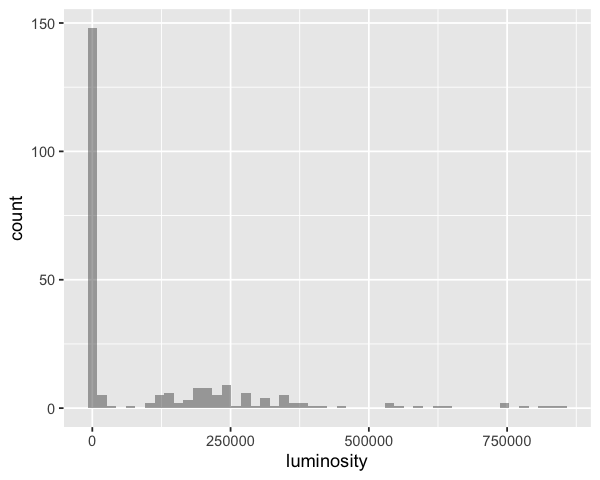

In [3]:
ggplot(data, aes(x=luminosity)) + 
    geom_histogram(bins=50, alpha=0.5)

Or, more usefully, on a log scale:

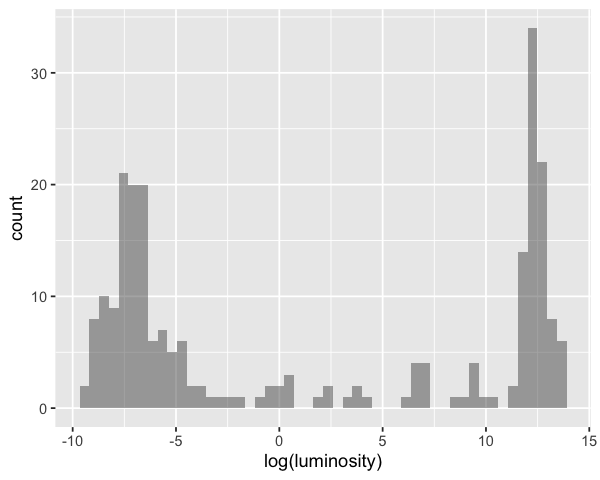

In [4]:
ggplot(data, aes(x=log(luminosity))) + 
    geom_histogram(bins=50, alpha=0.5)

We can split the data by another variable to compare different groups of stars. 

For example, the following box plot shows log(luminosity), grouped by type:

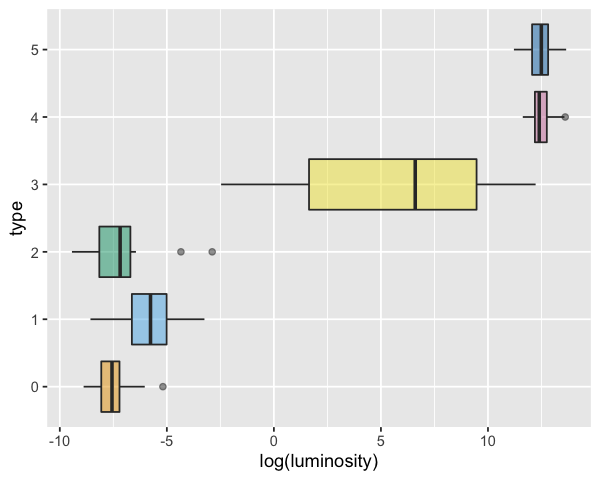

In [5]:
ggplot(data, aes(x=type, y=log(luminosity), fill=type)) + 
    scale_fill_manual(values=cbPal) +
    geom_boxplot(alpha=0.5) + 
    guides(fill="none") +
    coord_flip()                                          
    

---